# Introduction to Python final project

Author: Jakub Zapaśnik (38401)

Desc: Neural network binary model for cats/dogs image recognition. 
 - Image import
     - 25000 images in total
     - 100x100 reshape
 
 - Model build
     
 - Model evaluation
 
     - display accuracy and loss on train and test samples + model summary
     
 - 6 pictures corretcly and 6 incorrectly predited
 
     - loop throgh randomly picked test images to see 6 correctly and incorrectly predicted
 - My own pictures evaluation

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from imports_for_ML import load_images
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import load_model
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

## Image import 

In [2]:
img_dir = r'C:\Users\zapas\Python\Class 9\train'
images = os.listdir(img_dir)
full_images = [os.path.join(img_dir, img) for img in images]

In [3]:
X, y = load_images(img_dir, n_images=25000, resize=(100, 100))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

## Model build


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [9]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(128,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),
    Flatten( input_shape = (5, 5,32)),
    Dense(518, activation = 'relu'),   
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
stop_early = EarlyStopping(patience = 4)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)

In [13]:
history = model.fit(X_train, y_train, epochs = 30, validation_split=0.04, callbacks = [stop_early, learning_rate_reduction])

Epoch 1/30
600/600 [==============================] - 75s 125ms/step - loss: 0.7285 - accuracy: 0.6671 - val_loss: 0.4812 - val_accuracy: 0.7613 - lr: 0.0010
Epoch 2/30
600/600 [==============================] - 76s 127ms/step - loss: 0.5067 - accuracy: 0.7521 - val_loss: 0.8177 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 3/30
600/600 [==============================] - 77s 128ms/step - loss: 0.4622 - accuracy: 0.7804 - val_loss: 0.4850 - val_accuracy: 0.7837 - lr: 0.0010
Epoch 4/30
600/600 [==============================] - 78s 130ms/step - loss: 0.4134 - accuracy: 0.8094 - val_loss: 0.6067 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 5/30
600/600 [==============================] - 78s 131ms/step - loss: 0.3702 - accuracy: 0.8331 - val_loss: 0.4009 - val_accuracy: 0.8263 - lr: 0.0010
Epoch 6/30
600/600 [==============================] - 78s 130ms/step - loss: 0.3443 - accuracy: 0.8466 - val_loss: 0.4349 - val_accuracy: 0.8037 - lr: 0.0010
Epoch 7/30
600/600 [==============================] 

In [19]:
keras.models.save_model(model = model, filepath = r'C:\Users\zapas\Python\Class 9\Jakub_Zapasnik_38401_model1', save_format = "h5")

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 98, 98, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 49, 49, 32)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (32, 49, 49, 32)         128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (32, 49, 49, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (32, 47, 47, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 23, 23, 32)         0

## Model evaluation

In [15]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
625/625 [==============================] - 17s 27ms/step - loss: 0.0312 - accuracy: 0.9930
0.9929500222206116

Accuracy on the test data:
157/157 [==============================] - 5s 26ms/step - loss: 0.2393 - accuracy: 0.9162
0.9161999821662903


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


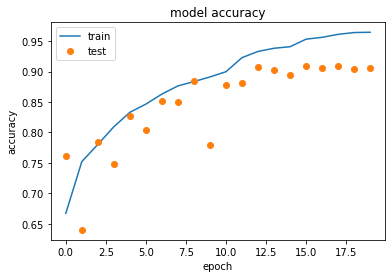

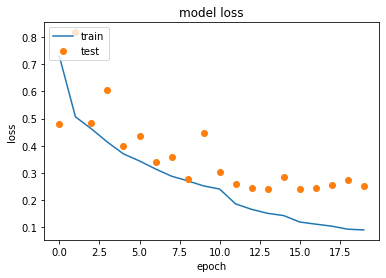

In [16]:
#history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6 pictures correctly and 6 incorrectly predicted

In [5]:
model = load_model((r'C:\Users\zapas\Python\Class 9\Jakub_Zapasnik_38401_model'))

In [29]:
# take every jpg, label and prediciton 
test_sample = X_test
predictions = model.predict(test_sample)
true_labels = y_test
#create empty lists to be filled with correctly predicted and incorrectly predicted dogs/cats + value of their prediction
list_corr = []
list_corr_claim = []
list_incorr = []
list_incorr_claim = []
# generate and make an array of randomized not duplicated numbers from 0-1000
y = random.sample(range(1000), 1000)
y = np.array(y)
#if we set y as array of numbers of our choice it will also work. 

In [30]:
#loop through array of random numbers
for x in np.nditer(y):
#recognize random number as place of picture inside test_sample
    z = (test_sample[x]/255)
#if 0 the label is a cat, if 1 the label is a dog
    correct_response = true_labels[x]
    it_is_really = ['cat', 'dog'][correct_response]
#img to array 
    img_array = img_to_array(z)
#predicitons as number from 0.00 to 1.00
    net_claims = pd.to_numeric(predictions[x,0])
#if statement for predictions above 50%
    if net_claims > 0.5 and it_is_really == 'cat':
        if len(list_incorr) > 5:
            pass
        else:
            list_incorr.append(z)
            list_incorr_claim.append(net_claims)
    elif net_claims > 0.5 and it_is_really == 'dog':
        if len(list_corr) > 5:
            pass
        else:
            list_corr.append(z)
            list_corr_claim.append(net_claims)
#predictions below or equal 50%
    elif net_claims <= 0.5 and it_is_really == 'cat':
        if len(list_corr) > 5:
            pass
        else:
            list_corr.append(z)
            list_corr_claim.append(net_claims)
    elif net_claims <= 0.5 and it_is_really == 'dog':
        if len(list_incorr) > 5:
            pass
        else:
            list_incorr.append(z)
            list_incorr_claim.append(net_claims)
#check if lsits are full- there might be a possibility that list with incor can be not filled due to lack of incorr predicted.
#that is why the number of generated numbers is 1000 and whole test sample is taken from X-Test. 
#Otherwise if for example we take first 100 X_tests there is big chance we won't find 6 incorr predicted images- I checked. 
#What is important loop the "pass" is for looping through numbers test sample until we fill the lists with 6 pictures. 
print(len(list_corr))
print(len(list_incorr))
print(len(list_corr_claim))
print(len(list_incorr_claim))

6
6
6
6


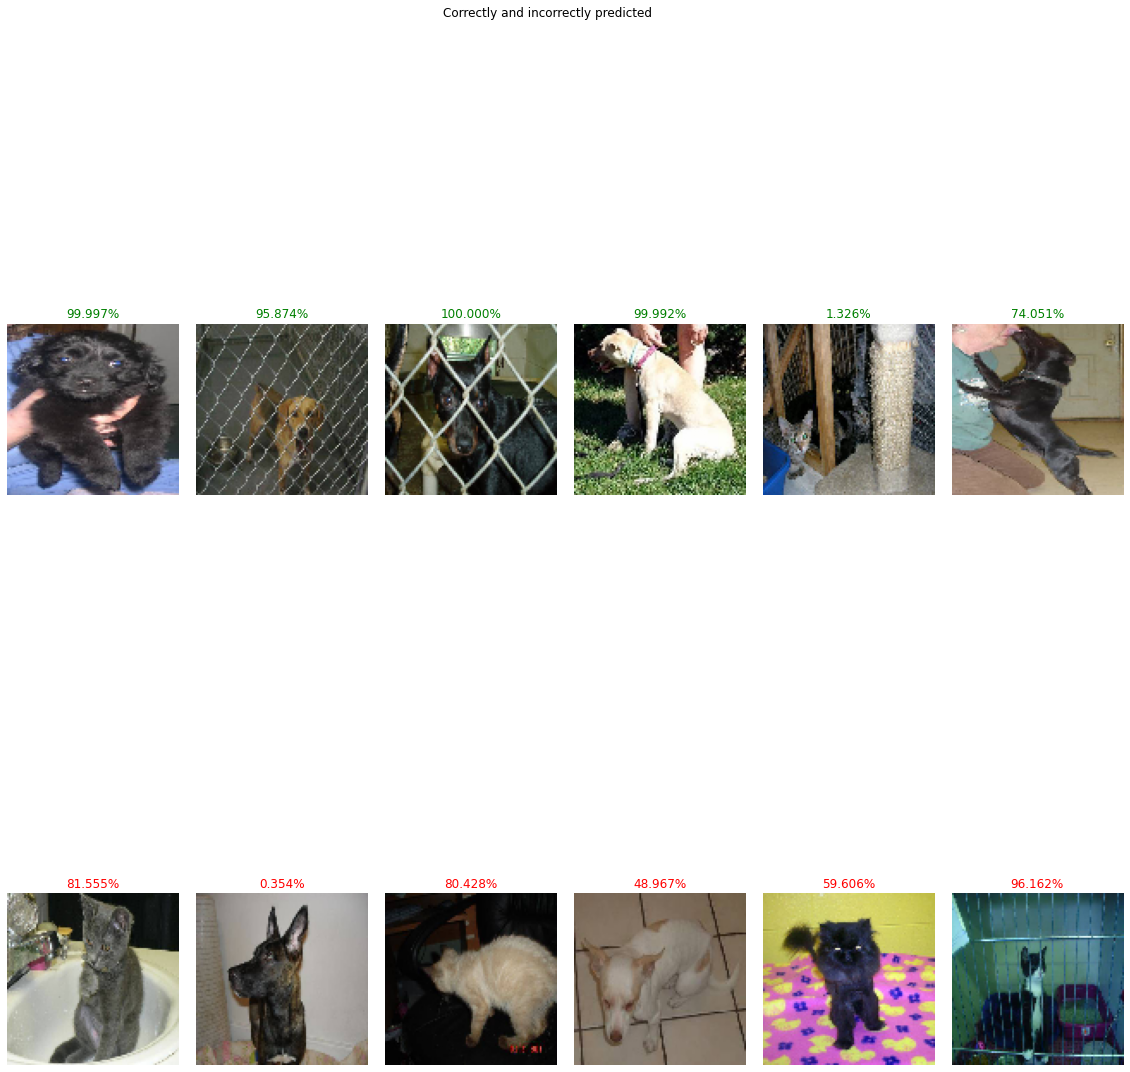

In [31]:
#create 6x2 grid with images
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 20), squeeze = False)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

#plot each image from list- top row corr_predicted, low row- incorrectly_ predicted and set title from lists with net_claims 
plt.suptitle("Correctly and incorrectly predicted")
ax[0, 0].imshow(list_corr[0]) 
ax[0, 0].set_title('{:.3f}%'.format(list_corr_claim[0] * 100), color = 'green')
ax[0, 1].imshow(list_corr[1]) 
ax[0, 1].set_title('{:.3f}%'.format(list_corr_claim[1] * 100), color = 'green')
ax[0, 2].imshow(list_corr[2]) 
ax[0, 2].set_title('{:.3f}%'.format(list_corr_claim[2] * 100), color = 'green')
ax[0, 3].imshow(list_corr[3]) 
ax[0, 3].set_title('{:.3f}%'.format(list_corr_claim[3] * 100), color = 'green')
ax[0, 4].imshow(list_corr[4]) 
ax[0, 4].set_title('{:.3f}%'.format(list_corr_claim[4] * 100), color = 'green')
ax[0, 5].imshow(list_corr[5]) 
ax[0, 5].set_title('{:.3f}%'.format(list_corr_claim[5] * 100), color = 'green')
ax[1, 0].imshow(list_incorr[0]) 
ax[1, 0].set_title('{:.3f}%'.format(list_incorr_claim[0] * 100), color = 'red')
ax[1, 1].imshow(list_incorr[1]) 
ax[1, 1].set_title('{:.3f}%'.format(list_incorr_claim[1] * 100), color = 'red')
ax[1, 2].imshow(list_incorr[2]) 
ax[1, 2].set_title('{:.3f}%'.format(list_incorr_claim[2] * 100), color = 'red')
ax[1, 3].imshow(list_incorr[3]) 
ax[1, 3].set_title('{:.3f}%'.format(list_incorr_claim[3] * 100), color = 'red')
ax[1, 4].imshow(list_incorr[4]) 
ax[1, 4].set_title('{:.3f}%'.format(list_incorr_claim[4] * 100), color = 'red')
ax[1, 5].imshow(list_incorr[5]) 
ax[1, 5].set_title('{:.3f}%'.format(list_incorr_claim[5] * 100), color = 'red')
for a in ax.ravel():
    a.axis('off')

## My own pictures evaluation

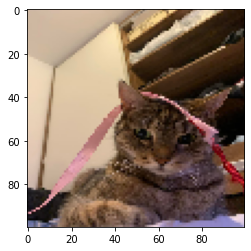

In [62]:
img1 = load_img(r'C:\Users\zapas\Python\Class 9\kot.jpg', target_size=(100, 100))
plt.imshow(img1)

In [66]:
img_array1 = img_to_array(img1)
model.predict(img_array1.reshape(1,100,100,3))

array([[0.00032768]], dtype=float32)

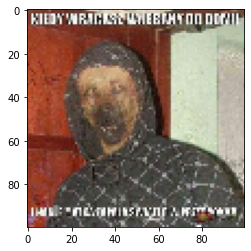

In [67]:
img2 = load_img(r'C:\Users\zapas\Python\Class 9\pieseł.jpg', target_size=(100, 100))
plt.imshow(img2)

In [68]:
img_array2 = img_to_array(img2)
model.predict(img_array2.reshape(1,100,100,3))

array([[0.97053885]], dtype=float32)

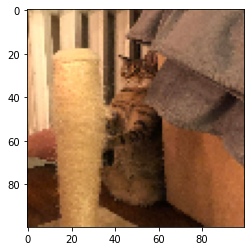

In [74]:
img3 = load_img(r'C:\Users\zapas\Python\Class 9\kiteł.jpg', target_size=(100, 100))
plt.imshow(img3)

In [75]:
img_array3 = img_to_array(img3)
model.predict(img_array3.reshape(1,100,100,3))

array([[0.05015349]], dtype=float32)